Text(0, 0.5, 'Суммарный объём продаж')

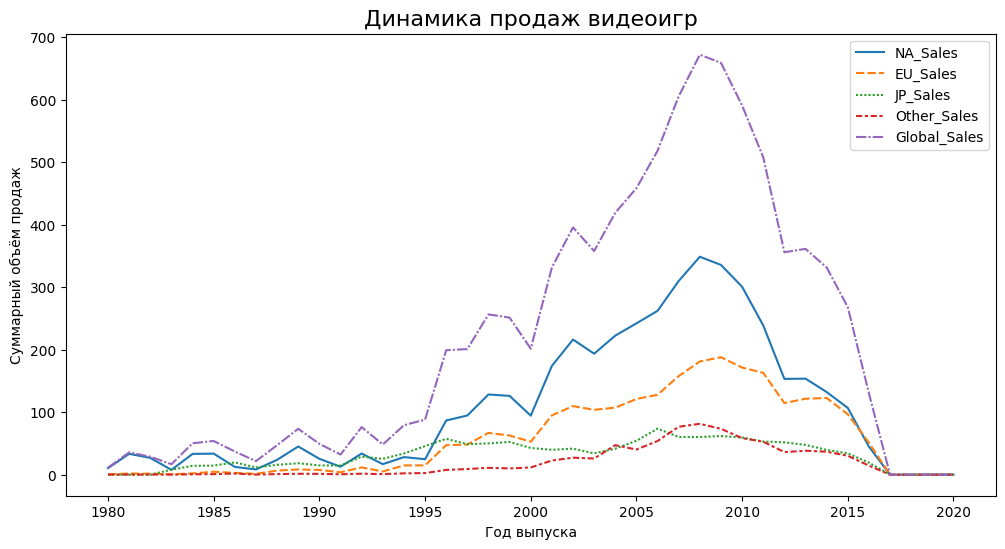

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

Text(0, 0.5, 'Количество объектов')

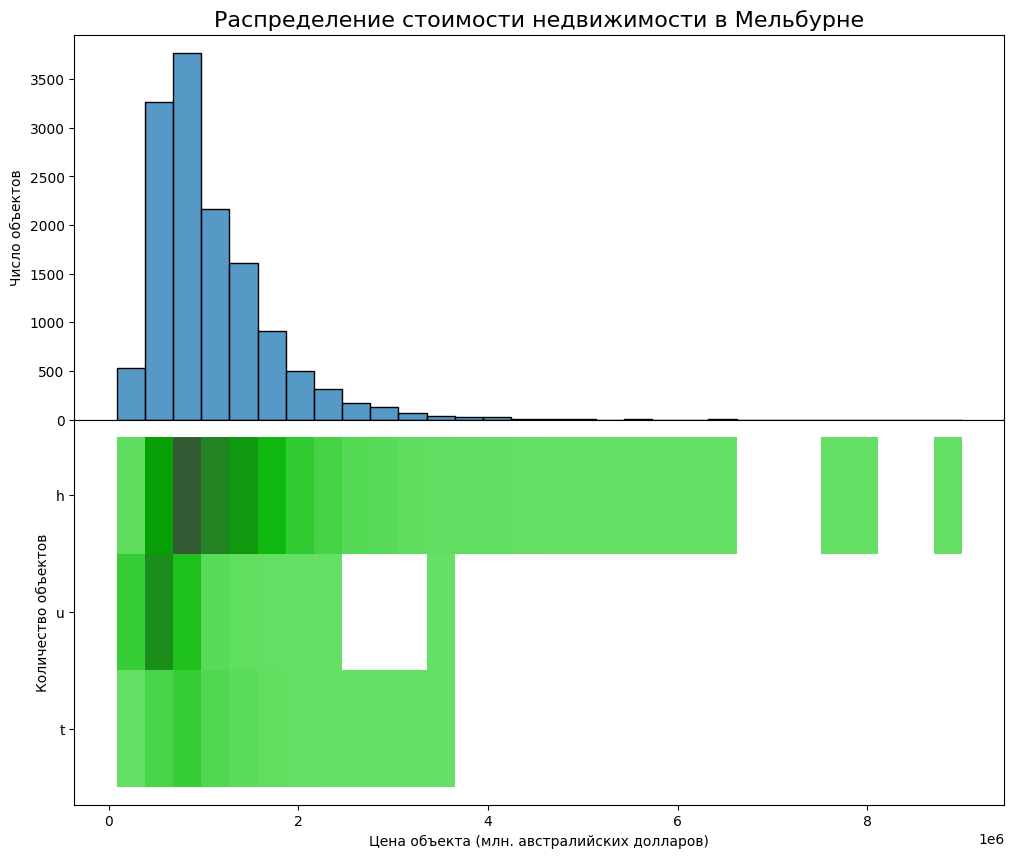

In [2]:
melb_data = pd.read_csv('data/melb_data.csv', sep=',')
fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data,
    x='Price',
    bins=30,
    ax=axes[0]
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize = 16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Количество объектов')

In [3]:
covid_data = pd.read_csv('data/covid_data.csv')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [4]:
covid_data.head()

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

## Предобработка данных

In [5]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.head()

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

In [6]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [7]:
covid_data.tail()

date                         country  confirmed  deaths  \
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  
15933        0.0     0.0              0.0           0.0              0.0  
16595        0.0     0.0              0.0           0.0              0.0  
16938        0.0     0.0              0.0           0.0              0.0  
17290        0.0     0.0              0.0           0.0              0.0  
17645        0.0     0.0              0.0           0.0              0.0

In [8]:
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [9]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

In [10]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [11]:
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
mask = covid_df['country'] == 'United States'
mask2 = covid_df['death_rate'].notnull()
covid_df[mask & mask2][['death_rate', 'confirmed', 'deaths']].sort_values(by='death_rate')

death_rate  confirmed   deaths
82542    0.000000        1.0      0.0
82543    0.000000        1.0      0.0
82544    0.000000        2.0      0.0
82545    0.000000        2.0      0.0
82546    0.000000        5.0      0.0
...           ...        ...      ...
82657    6.071115  1469104.0  89191.0
82654    6.075227  1391915.0  84562.0
82655    6.086073  1418928.0  86357.0
82656    6.092746  1444045.0  87982.0
82584    7.189542      153.0     11.0

[494 rows x 3 columns]

In [12]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

np.float64(67.06)

# Базовая визуализация в Pandas

Основным методом для создания простейших графиков является инструмент plot()

## Основные методы параметра plot():
 - x - название признака оси абсцисс
 - y - название признака оси ординат
 - figsize - размер графика(кортеж из ширины и высоты в дюймах)
 - kind - Тип визуализации:
    - 'line' - линейный график
    - 'bar' - столбчатая диаграмма
    - 'barh' - горизонтальная столбчатая диаграмма
    - hist - гистограмма
    - box - коробчатая диаграмма
    - pie - круговая диаграмма
    - scatter - диаграмма рассеивания
 - grid - отображение сетки (False)
 - legeng - отображение легенды (False)
 - title - название графика
 - color - цвет

<Axes: title={'center': 'Ежедневная заболеваемость'}, xlabel='date'>

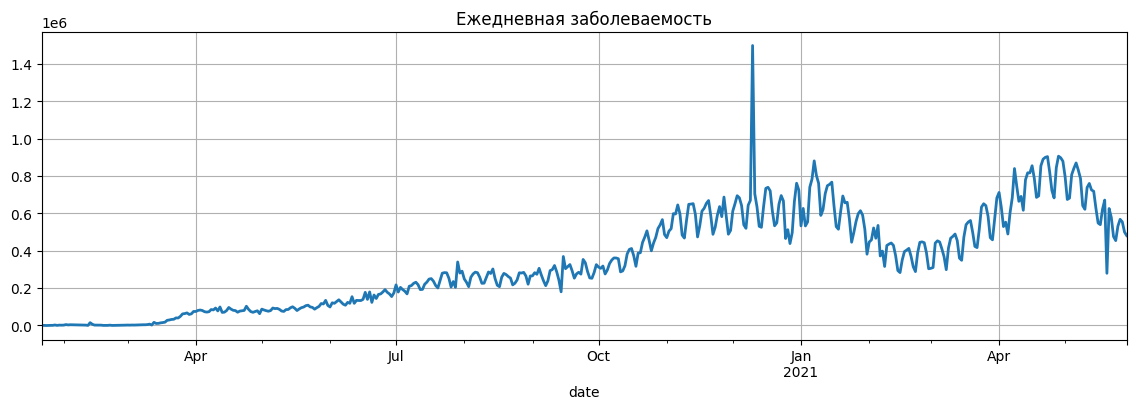

In [13]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(14,4),
    grid='True',
    title='Ежедневная заболеваемость',
    lw=2
)

<Axes: title={'center': 'Распределение заболеваемости'}, ylabel='Frequency'>

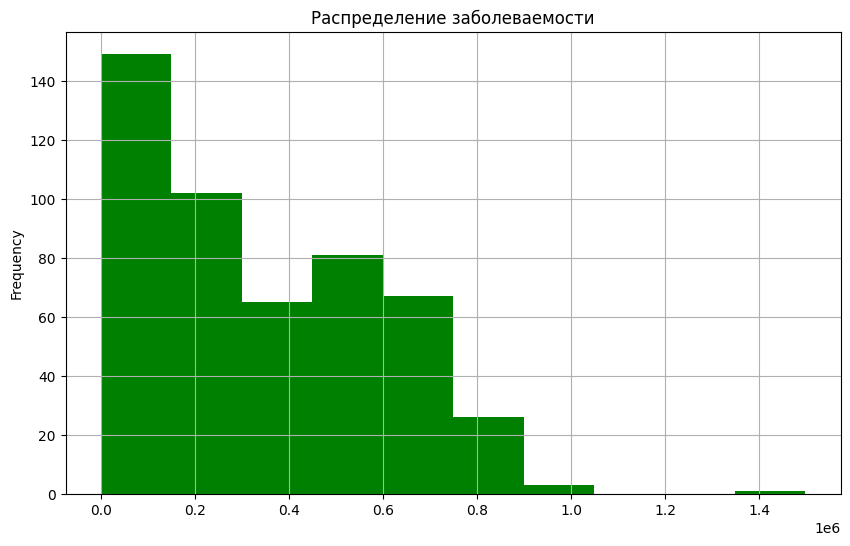

In [14]:
#Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого 
# параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение заболеваемости',
    color='green',
    bins=10,
    grid='True'
)

<Axes: xlabel='country'>

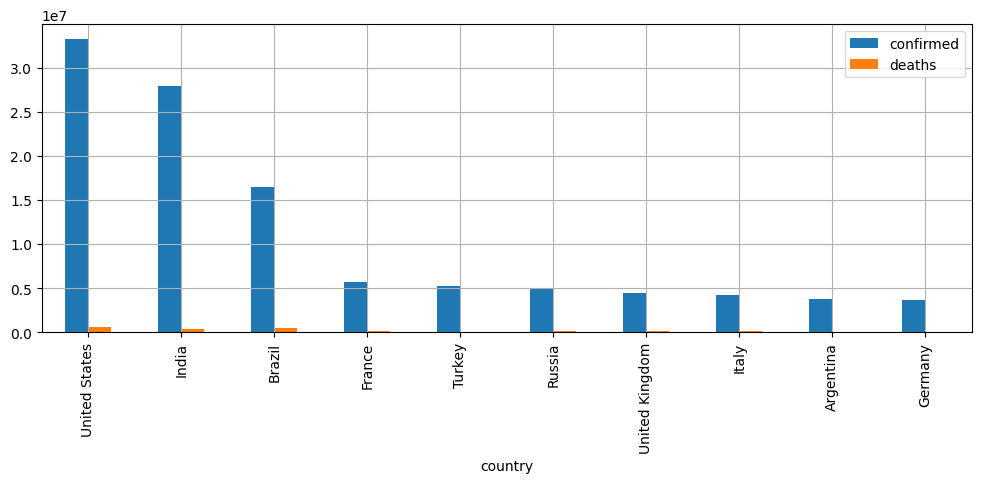

In [15]:
# Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
# Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель 
# с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
#Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика

countries = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
countries = countries.nlargest(10, columns=['confirmed'])
countries.plot(
    kind='bar',
    grid='True',
    figsize=(12,4)
)

<Axes: xlabel='country'>

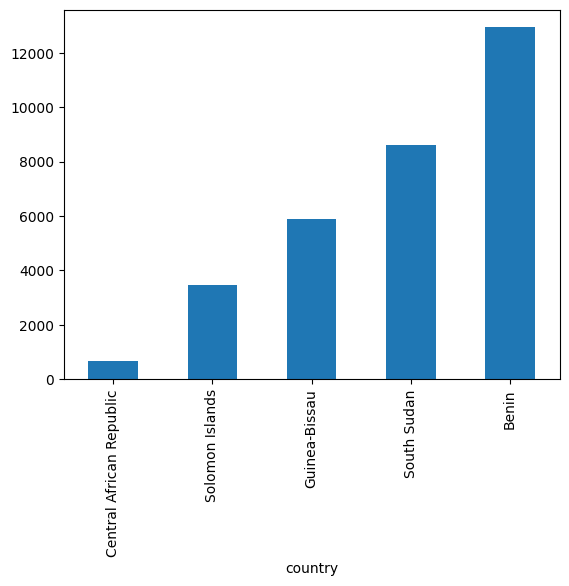

In [16]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#Для более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.
plt.style.use('default')

## Методы параметра scatter()
 - x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
 - s — размер маркеров;
 - marker — вид маркеров ('o' — точки, '^' — треугольники);
 - c — цвет маркеров.

Построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

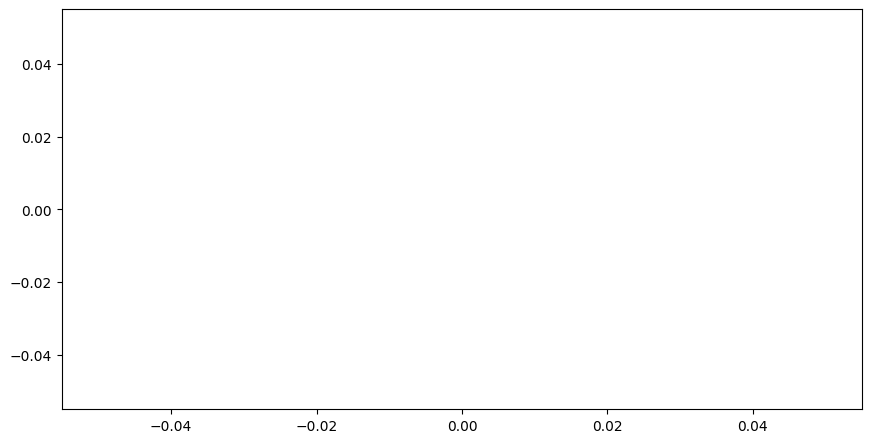

In [18]:
us_data = covid_df[covid_df['country'] == 'Unated States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x = us_data['people_fully_vaccinated'],
    y = us_data['daily_confirmed'],
    s = 100,
    marker = 'o',
    c = 'green'
)

## Основные параметры метода pie():
 - x — значения, по которым будет строиться круговая диаграмма;
 - labels — метки, соответствующие значениям;
 - autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
 - explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

([<matplotlib.patches.Wedge at 0x2868c405010>,
 [Text(0.7665420850598537, 0.9232622768380024, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.593147054630085, 0.9263782011595778, 'Oxford/AstraZeneca'),
  Text(-1.0669756914402408, 0.2675123807894132, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691396926701603, -0.520353971918335, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.4285588134061492, -1.0130830881284683, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.16276478967892033, -1.0878913655511644, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404450594641427, -0.894332223397978, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150659290417462, -0.6104542124573851, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.0347732735903306, -0.37315448846711075, 'Pfizer/BioNTech'),
  Text(1.0927241988120744, -0.12630845312373262, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471

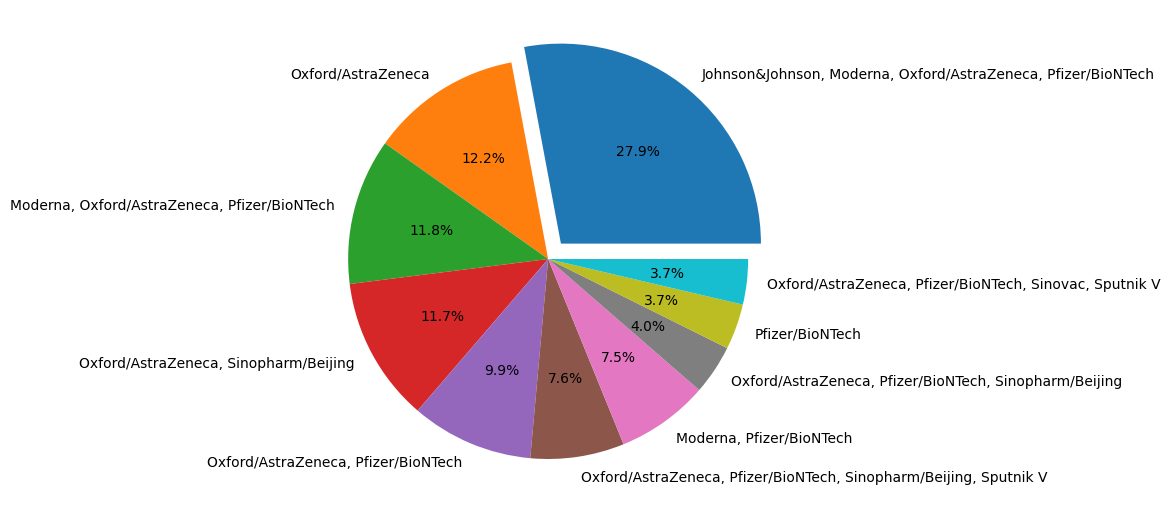

In [19]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)

## Добавление информативности в графики:
 - axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
 - axes.set_xlabel() — название оси абсцисс;
 - axes.set_ylabel() — название оси ординат;
 - axes.set_xticks() — установка отметок на оси абсцисс;
 - axes.set_yticks() — установка отметок на оси ординат;
 - axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
 - axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
 - axes.legend() — отображение легенды;
 - axes.grid() — установка сетки.

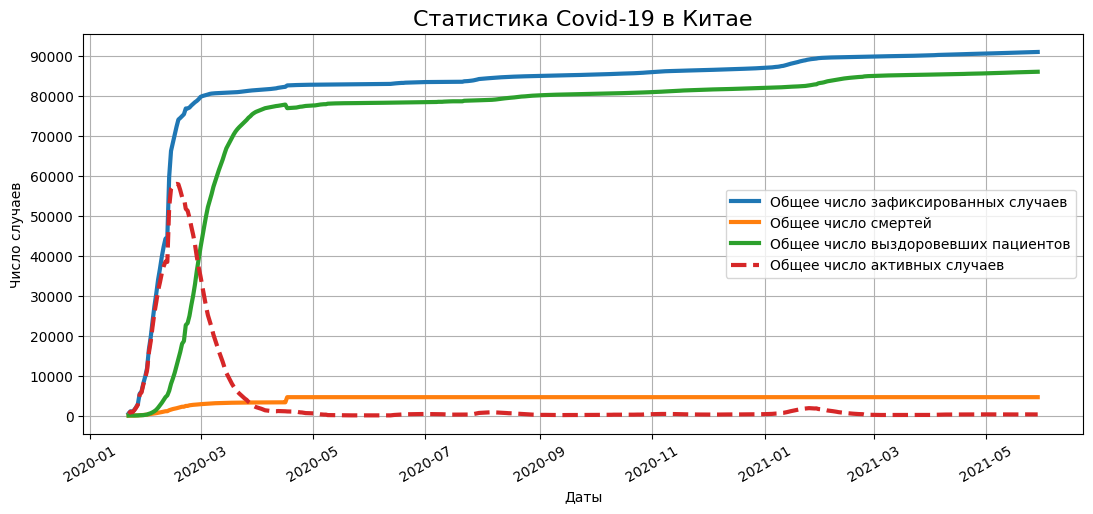

In [20]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

## Основные параметры метода bar():

 - x — названия категорий, которые будут располагаться по оси абсцисс;
 - height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
 - width — ширина столбцов диаграммы;
 - color — цвет

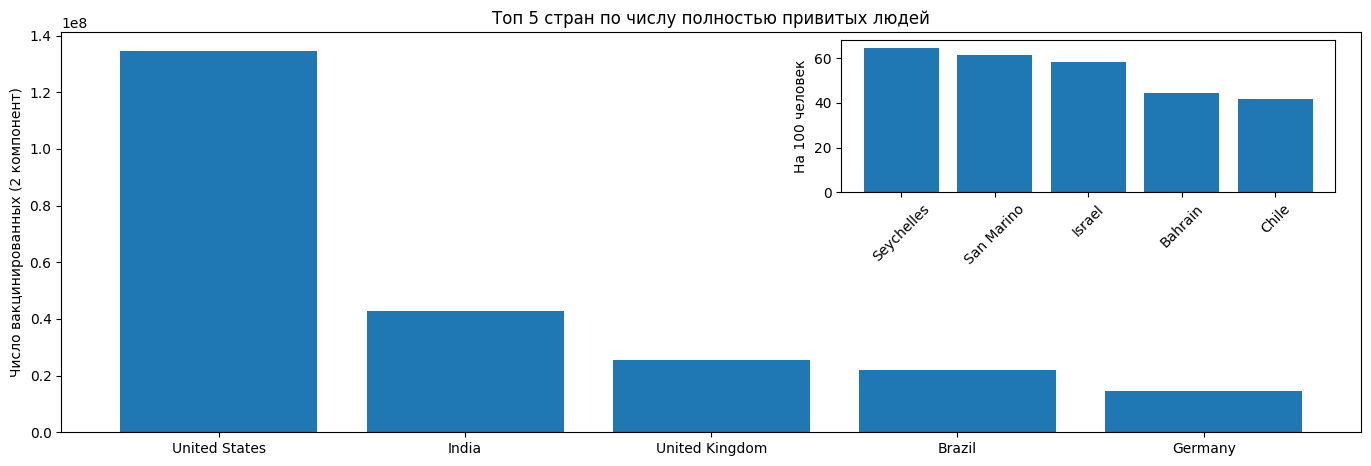

In [21]:
# Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), 
# а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

# Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() 
# и выбираем ТОП-5 стран с использованием метода nlargest().
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

# Визуализация ГЛАВНОГО графика

fig = plt.figure(figsize=(13,4))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x = vacc_country.index, height=vacc_country)
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

# Визуализация вспомогательного графика

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height=vacc_country_per_hundred)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

## Subplots()

## Основные параметры метода subplots():
 - nrows — число строк;
 - ncols — число столбцов;
 - figsize — общий размер фигуры в дюймах (ширина и высота).

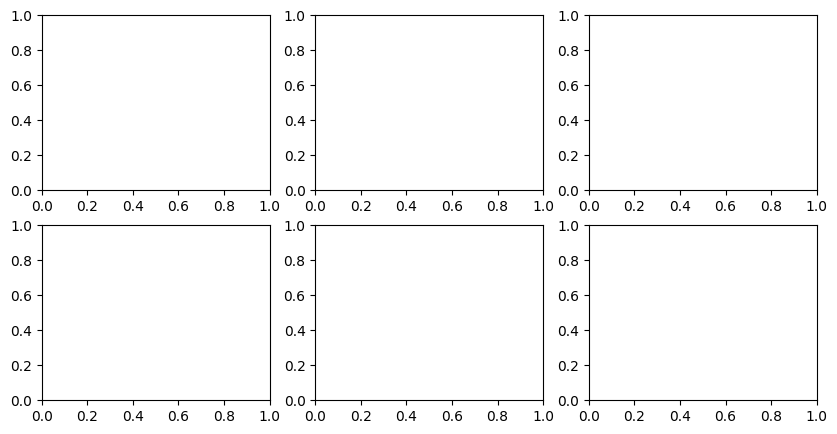

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

## Параметры метода hist():

 - x — массив чисел, для которого строится гистограмма;
 - bins — число столбцов (корзин);
 - orientation — ориентация гистограммы (по умолчанию 'vertical');
 - color — цвет.

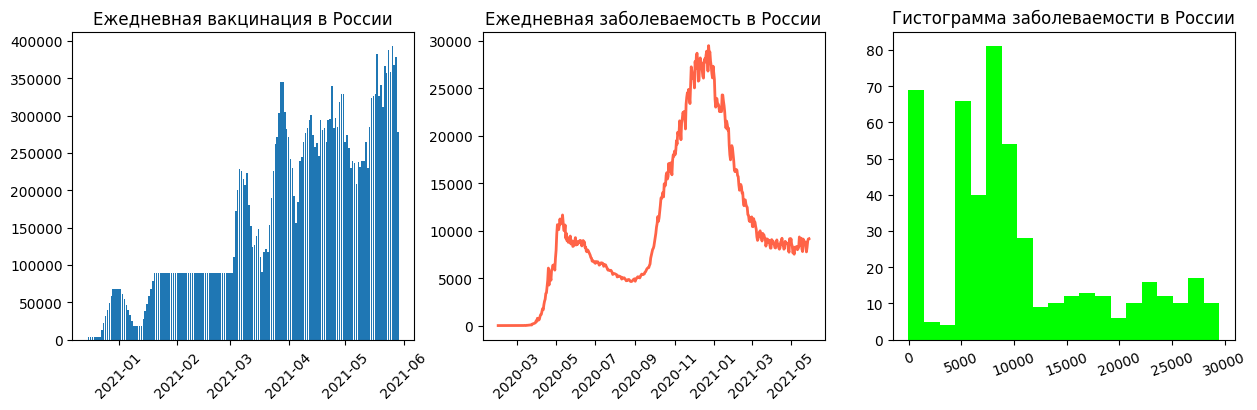

In [23]:
# Теперь, обладая знаниями о методе subplots(), построим три графика:

# Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
# Линейный график изменения ежедневной заболеваемости в стране.
# Гистограмму ежедневной заболеваемости в стране.
# За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

rus_data = covid_df[covid_df['country'] == 'Russia']
# Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2).
# Визуализация системы координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15, 4))

# Столбчатая диаграмма
axes[0].bar(
    x=rus_data['date'],
    height = rus_data['daily_vaccinations'],
    label = 'Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# Линейный график
axes[1].plot(
    rus_data['date'],
    rus_data['daily_confirmed'],
    label = "Число заболевших",
    color = 'tomato',
    lw=2
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

# Гистограмма
axes[2].hist(
    x=rus_data['daily_confirmed'],
    label = ['Число заболевших'],
    color = 'lime',
    bins = 20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=20)

# Графические возможности библиотеки Seaborn

In [24]:
import seaborn as sns
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

## Основные методы histplot():
 - data — DataFrame, по которому строится график;
 - x — признак, который будет отложен по оси абсцисс;
 - y — признак, который будет отложен по оси ординат;
 - hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
 - ax — система координат Matplotlib, в которой строится график;
 - color — цвет графика;
 - bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
 - kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию Fal

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

<Axes: xlabel='daily_confirmed_per_hundred', ylabel='country'>

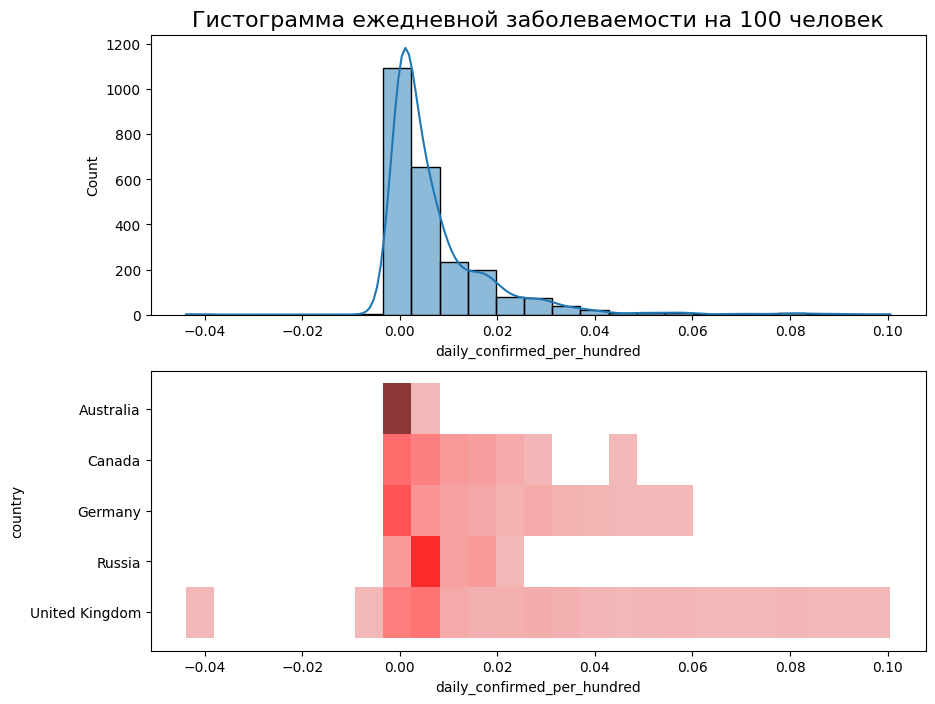

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)

Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее в задании 3.3.

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

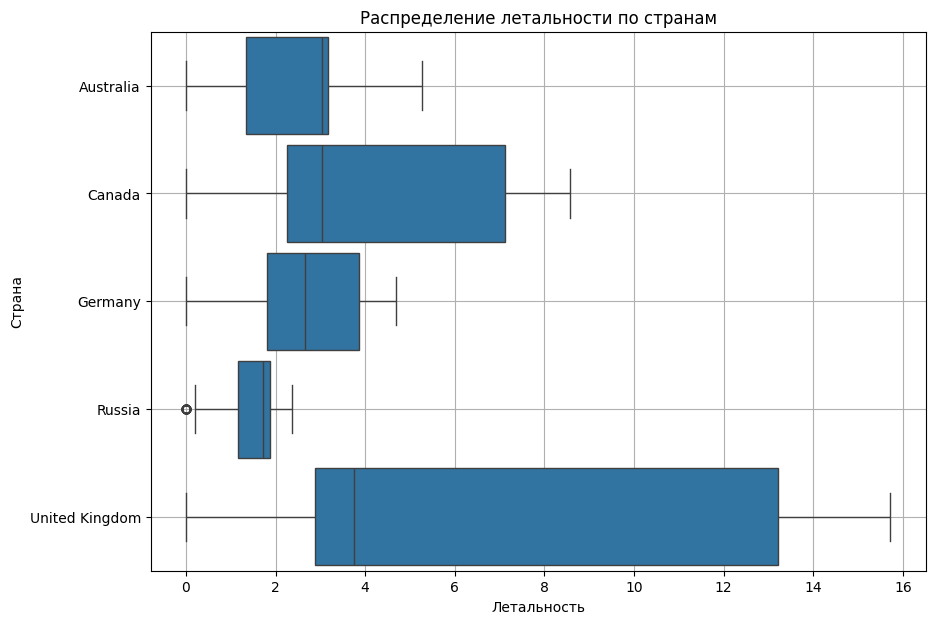

In [26]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

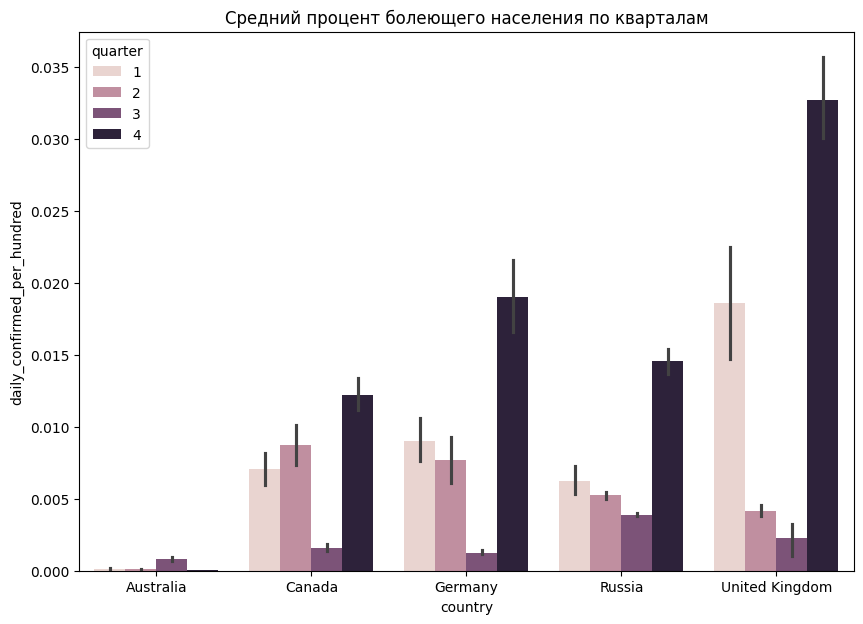

In [27]:
fig = plt.figure(figsize=(10,7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам')

Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

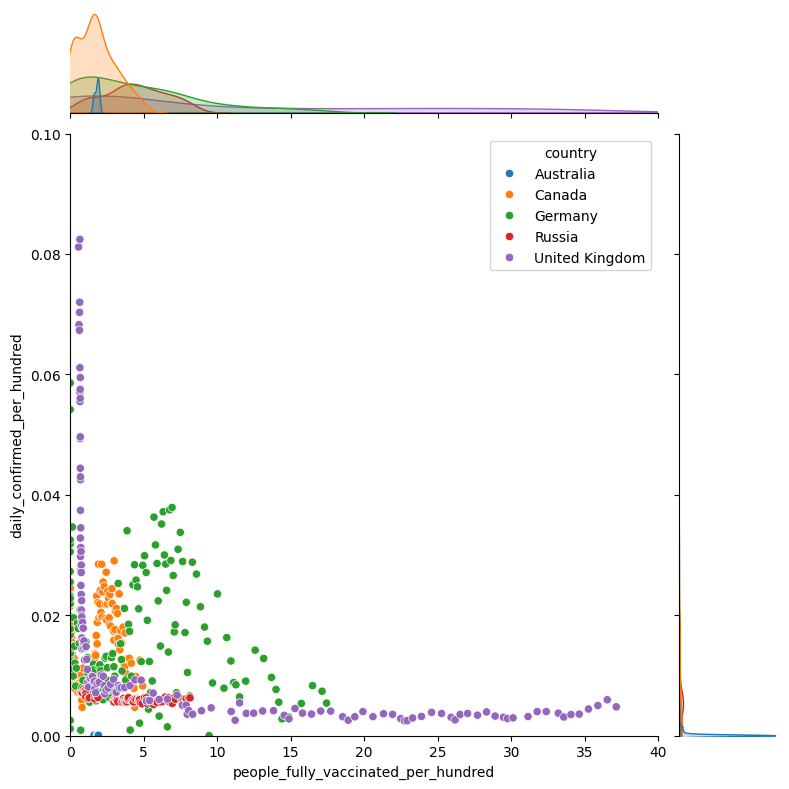

In [28]:
joinplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim= (0,40),
    ylim= (0, 0.1),
    height=8
)

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [29]:
pivot = croped_covid_df.pivot_table(
    values = 'people_vaccinated_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

Text(0.5, 1.0, 'Тепловая карта вакцинации')

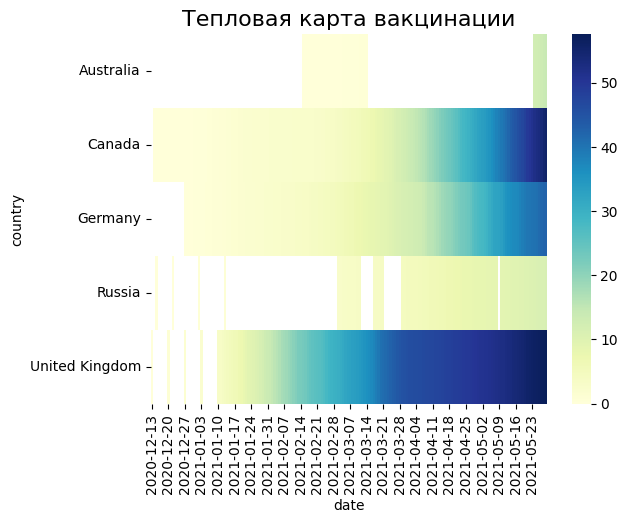

In [30]:
heatmap = sns.heatmap(data=pivot,cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)

Text(0.5, 1.0, 'Число заболевших от общего числа населения')

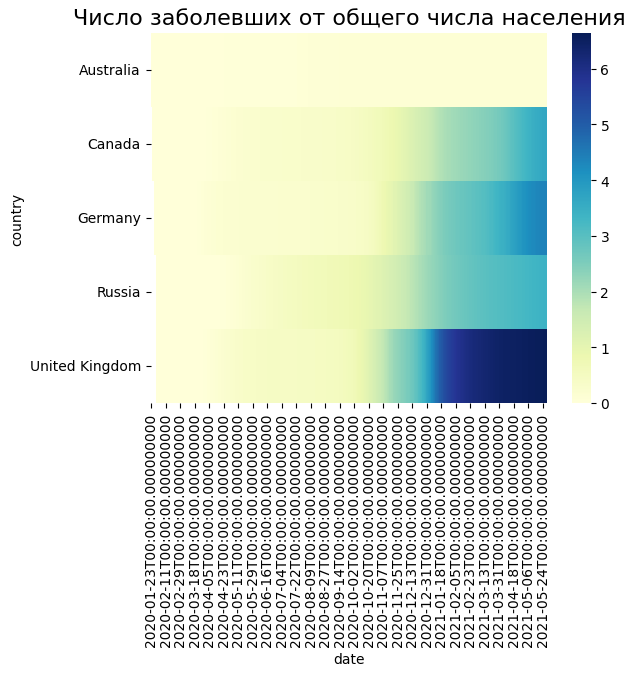

In [31]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot2 = croped_covid_df.pivot_table(
    values = 'confirmed_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
heatmap2 = sns.heatmap(data=pivot2, cmap='YlGnBu')
heatmap2.set_title('Число заболевших от общего числа населения', fontsize=16)

# Графические возможности библиотеки Plotly

In [32]:
import plotly
import plotly.express as px
print(plotly.__version__)

6.0.0


Построим график роста зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений (recovered) и активных случаев (active) за всё время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().

In [33]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame = line_data,
    x='date',
    y=['confirmed', 'deaths', 'recovered', 'active'],
    height = 500,
    width = 1000,
    title = 'Confirmed, Recovered, Deaths, Active cases over Time'
)
fig.show()

Давайте рассмотрим ещё один пример — построим столбчатую диаграмму, показывающую ТОП-10 стран по среднему проценту выздоравливающих пациентов (recover_rate). Для этого используем метод bar() модуля express. Добавим несколько параметров:

color — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;
text — текст, который будет подписан на столбцах диаграммы;
orientation — ориентация графика ('v' — вертикальная, 'h' — горизонтальная).

In [37]:
# Считаем средний процент выздоровления для каждой страны

bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

fig = px.bar(
    data_frame=bar_data,
    x = 'country',
    y = 'recover_rate',
    color = 'country',
    text = 'recover_rate',
    orientation='v',
    height=500,
    width=1000,
    title='Top 10 Countries for Recovery Rate'
)
fig.show()